In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [31]:
file1 = pd.read_csv("C:/python_casestudies/Pandas Case Study2_Credit Card Case Study/Customer Acqusition.csv")
file2 = pd.read_csv("C:/python_casestudies/Pandas Case Study2_Credit Card Case Study/spend.csv")
file3 = pd.read_csv("C:/python_casestudies/Pandas Case Study2_Credit Card Case Study/Repayment.csv")


#1. In the above dataset

In [32]:
#a. In case age is less than 18, replace it with mean of age values.

file1.loc[(file1.Age<18),['Age']]

,Age
13,16
40,13
62,15
67,12
69,16
89,16


In [33]:
######################### replacing age less than 18 with mean of age ######################

mean_age = file1.Age.mean()
file1.loc[(file1.Age<18), ['Age']] = mean_age

In [34]:
#now there are no people under 18 age values.

file1.loc[(file1.Age<18)]

,No,Customer,Age,City,Product,Limit,Company,Segment


#b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. 
# (customer’s limit provided in acquisition table is the per transaction limit on his card)

In [35]:
cust_spend = pd.merge(left = file1, right = file2, how = 'inner', left_on = 'Customer', right_on = 'Customer')

Amount = np.where(cust_spend.Amount > cust_spend.Limit, cust_spend.Limit/2, cust_spend.Amount)
cust_spend.Amount = Amount

In [36]:
cust_spend.head(10)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07
5,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,6,23-Feb-05,SANDALS,168285.60
6,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,7,1-Feb-05,CAR,23370.20
7,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,103,12-Jan-04,TRAIN TICKET,440563.22
8,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,117,5-Feb-04,BUS TICKET,52208.65
9,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,131,19-Apr-06,AIR TICKET,346925.68


#c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [37]:
cust_repay = pd.merge(left = file1, right = file3, how = 'inner', left_on = 'Customer', right_on = 'Customer')

cust_repay[cust_repay.Amount > cust_repay.Limit]

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount,Unnamed: 4
18,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,104.0,3-Jan-04,185955.07,NaN
19,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,118.0,28-Feb-05,412783.34,NaN
20,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,132.0,6-Apr-04,148038.67,NaN
21,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,146.0,23-Nov-04,179144.68,NaN
23,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,174.0,3-Aug-05,381635.66,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1486,87,A87,27.0,CALCUTTA,Silver,100003.0,C10,Govt,89.0,30-Mar-06,462283.02,NaN
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98.0,25-Jan-04,310992.30,NaN
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99.0,12-Jan-04,121874.90,NaN
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100.0,3-Jan-04,337815.57,NaN


In [38]:
#replacing cust amount with limit wherever amount is greater than limit.

cust_repay.loc[cust_repay.Amount > cust_repay.Limit,"Amount"] = cust_repay.Limit

In [39]:
cust_repay[cust_repay.Amount > cust_repay.Limit]

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount,Unnamed: 4


#2. From the above dataset create the following summaries:

In [40]:
#a. How many distinct customers exist?

distinct_cust_exist = file1.Customer.nunique()
distinct_cust_exist

100

In [41]:
# b. How many distinct categories exist?

dist_cat = file1.Segment.value_counts()
print("Total distinct categories are: ",len(dist_cat))

Total distinct categories are:  5


In [42]:
#c. What is the average monthly spend by customers?

file2.Month = pd.to_datetime(file2.Month, format = '%d-%b-%y')

In [43]:
#Extracting the month and year from 'Month' column 
file2['Monthly'] = file2['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%b"))
file2['year'] = pd.DatetimeIndex(file2['Month']).year

In [44]:
file2.head()

,Sl No:,Customer,Month,Type,Amount,Monthly,year
0,1,A1,2004-01-12,JEWELLERY,485470.80,Jan,2004
1,2,A1,2004-01-03,PETRO,410556.13,Jan,2004
2,3,A1,2004-01-15,CLOTHES,23740.46,Jan,2004
3,4,A1,2004-01-25,FOOD,484342.47,Jan,2004
4,5,A1,2005-01-17,CAMERA,369694.07,Jan,2005


In [45]:
#the average monthly spend by the customers is
file2.pivot_table(index = 'Monthly', columns = 'year', values = 'Amount', aggfunc = 'mean')

year,2004,2005,2006
Monthly,,,
Apr,235272.037143,252181.326429,232468.967553
Aug,NaN,233734.634286,240699.717143
Dec,NaN,147503.060000,270470.980714
Feb,221215.270000,229802.279821,253858.260714
Jan,251712.068664,292741.372857,282058.006429
Jul,NaN,229116.663571,287505.098929
Jun,NaN,262688.112857,177252.386429
Mar,232146.119286,NaN,247166.084654
May,217539.236429,245696.515429,236162.740357


In [46]:
# d. What is the average monthly repayment by customers?

file3['Month'] = pd.to_datetime(file2['Month'])

In [48]:
cust_repay['Month'] = pd.to_datetime(cust_repay['Month'])
cust_repay['Year'] = cust_repay['Month'].dt.year
cust_repay['month'] = cust_repay['Month'].dt.month
Avg_month_repay = cust_repay.groupby(["Year","month"])['Amount'].mean()
Avg_month_repay.reset_index()

,Year,month,Amount
0,2004,1,159971.502571
1,2004,2,125612.505556
2,2004,3,177767.948000
3,2004,4,175632.658000
4,2004,5,151310.396400
5,2004,9,118926.025625
6,2004,11,119226.575333
7,2005,1,181260.750000
8,2005,2,157356.791358
9,2005,4,121163.452000


In [49]:
cust_repay.head(5)

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount,Unnamed: 4,Year,month
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,NaN,2004-01-12,495414.75,NaN,2004,1
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,2004-01-03,245899.02,NaN,2004,1
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3.0,2004-01-15,259490.06,NaN,2004,1
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4.0,2004-01-25,437555.12,NaN,2004,1
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5.0,2005-01-17,165972.88,NaN,2005,1


In [50]:
#e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? 
#   (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment 
#   – Monthly spend. Interest is earned only on positive profits and not on negative amounts)


cust_spend_repay = pd.merge(left = file2, right = file3, how = 'inner', left_on = 'Customer', right_on = 'Customer')

In [51]:
cust_spend_repay.head(10)

,Sl No:,Customer,Month_x,Type,Amount_x,Monthly,year,SL No:,Month_y,Amount_y,Unnamed: 4
0,1,A1,2004-01-12,JEWELLERY,485470.8,Jan,2004,NaN,2004-01-12,495414.75,NaN
1,1,A1,2004-01-12,JEWELLERY,485470.8,Jan,2004,2.0,2004-01-03,245899.02,NaN
2,1,A1,2004-01-12,JEWELLERY,485470.8,Jan,2004,3.0,2004-01-15,259490.06,NaN
3,1,A1,2004-01-12,JEWELLERY,485470.8,Jan,2004,4.0,2004-01-25,437555.12,NaN
4,1,A1,2004-01-12,JEWELLERY,485470.8,Jan,2004,5.0,2005-01-17,165972.88,NaN
5,1,A1,2004-01-12,JEWELLERY,485470.8,Jan,2004,6.0,2005-02-23,365366.62,NaN
6,1,A1,2004-01-12,JEWELLERY,485470.8,Jan,2004,7.0,2005-02-01,14473.41,NaN
7,1,A1,2004-01-12,JEWELLERY,485470.8,Jan,2004,103.0,2004-01-12,350446.82,NaN
8,1,A1,2004-01-12,JEWELLERY,485470.8,Jan,2004,117.0,2004-02-05,117964.43,NaN
9,1,A1,2004-01-12,JEWELLERY,485470.8,Jan,2004,131.0,2006-04-19,79849.19,NaN


In [52]:
# renaming Amount_x and Amount_y columns 
cust_spend_repay = cust_spend_repay.rename(columns = {'Amount_x' : 'spend_Amount', 'Amount_y' : 'repay_Amount'})

In [53]:
interest_amt = cust_spend_repay.groupby(['year', 'Monthly'])['spend_Amount', 'repay_Amount'].sum()
interest_amt

spend_Amount  repay_Amount
year Monthly                            
2004 Apr      1.664730e+08  1.795128e+08
     Feb      1.469321e+08  1.736560e+08
     Jan      1.897246e+09  1.873917e+09
     Mar      8.938031e+07  9.071044e+07
     May      7.845624e+07  9.187162e+07
     Nov      9.321587e+07  8.943304e+07
     Sep      1.113694e+08  9.273326e+07
2005 Apr      1.985560e+08  1.944499e+08
     Aug      1.680120e+08  1.731517e+08
     Dec      5.088172e+07  8.954003e+07
     Feb      9.634808e+08  1.040628e+09
     Jan      2.227449e+08  1.796611e+08
     Jul      9.057456e+07  9.981389e+07
     Jun      3.216256e+08  3.144390e+08
     May      8.853393e+08  8.895885e+08
     Nov      3.057800e+08  2.582066e+08
     Oct      6.218014e+07  8.525009e+07
     Sep      6.404540e+07  7.888690e+07
2006 Apr      5.439827e+08  5.748955e+08
     Aug      9.520109e+07  1.017625e+08
     Dec      7.984531e+07  7.571813e+07
     Feb      2.529986e+08  2.372385e+08
     Jan      9.837846e+07  8.570876e+07
     Jul      2.165067e+08  1.858434e+08
     Jun      6.642966e+07  9.192668e+07
     Mar      1.274427e+09  1.282546e+09
     May      3.090216e+08  3.287737e+08
     Nov      1.141199e+08  1.590248e+08
     Oct      9.159175e+07  9.611769e+07
     Sep      6.765554e+07  9.996138e+07

In [54]:
# As Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment - Monthly spend
interest_amt["M_Profit"] = interest_amt.repay_Amount - interest_amt.spend_Amount
interest_amt

spend_Amount  repay_Amount      M_Profit
year Monthly                                          
2004 Apr      1.664730e+08  1.795128e+08  1.303982e+07
     Feb      1.469321e+08  1.736560e+08  2.672382e+07
     Jan      1.897246e+09  1.873917e+09 -2.332889e+07
     Mar      8.938031e+07  9.071044e+07  1.330130e+06
     May      7.845624e+07  9.187162e+07  1.341538e+07
     Nov      9.321587e+07  8.943304e+07 -3.782822e+06
     Sep      1.113694e+08  9.273326e+07 -1.863619e+07
2005 Apr      1.985560e+08  1.944499e+08 -4.106119e+06
     Aug      1.680120e+08  1.731517e+08  5.139660e+06
     Dec      5.088172e+07  8.954003e+07  3.865831e+07
     Feb      9.634808e+08  1.040628e+09  7.714694e+07
     Jan      2.227449e+08  1.796611e+08 -4.308380e+07
     Jul      9.057456e+07  9.981389e+07  9.239324e+06
     Jun      3.216256e+08  3.144390e+08 -7.186644e+06
     May      8.853393e+08  8.895885e+08  4.249144e+06
     Nov      3.057800e+08  2.582066e+08 -4.757341e+07
     Oct      6.218014e+07  8.525009e+07  2.306995e+07
     Sep      6.404540e+07  7.888690e+07  1.484150e+07
2006 Apr      5.439827e+08  5.748955e+08  3.091275e+07
     Aug      9.520109e+07  1.017625e+08  6.561440e+06
     Dec      7.984531e+07  7.571813e+07 -4.127180e+06
     Feb      2.529986e+08  2.372385e+08 -1.576011e+07
     Jan      9.837846e+07  8.570876e+07 -1.266970e+07
     Jul      2.165067e+08  1.858434e+08 -3.066337e+07
     Jun      6.642966e+07  9.192668e+07  2.549702e+07
     Mar      1.274427e+09  1.282546e+09  8.118767e+06
     May      3.090216e+08  3.287737e+08  1.975206e+07
     Nov      1.141199e+08  1.590248e+08  4.490487e+07
     Oct      9.159175e+07  9.611769e+07  4.525937e+06
     Sep      6.765554e+07  9.996138e+07  3.230584e+07

In [55]:
# As all profit amount is in positive.
interest_amt["M_interest"] = interest_amt.M_Profit * 2.9/100
interest_amt

spend_Amount  repay_Amount      M_Profit    M_interest
year Monthly                                                        
2004 Apr      1.664730e+08  1.795128e+08  1.303982e+07  3.781546e+05
     Feb      1.469321e+08  1.736560e+08  2.672382e+07  7.749907e+05
     Jan      1.897246e+09  1.873917e+09 -2.332889e+07 -6.765378e+05
     Mar      8.938031e+07  9.071044e+07  1.330130e+06  3.857378e+04
     May      7.845624e+07  9.187162e+07  1.341538e+07  3.890460e+05
     Nov      9.321587e+07  8.943304e+07 -3.782822e+06 -1.097019e+05
     Sep      1.113694e+08  9.273326e+07 -1.863619e+07 -5.404494e+05
2005 Apr      1.985560e+08  1.944499e+08 -4.106119e+06 -1.190775e+05
     Aug      1.680120e+08  1.731517e+08  5.139660e+06  1.490501e+05
     Dec      5.088172e+07  8.954003e+07  3.865831e+07  1.121091e+06
     Feb      9.634808e+08  1.040628e+09  7.714694e+07  2.237261e+06
     Jan      2.227449e+08  1.796611e+08 -4.308380e+07 -1.249430e+06
     Jul      9.057456e+07  9.981389e+07  9.239324e+06  2.679404e+05
     Jun      3.216256e+08  3.144390e+08 -7.186644e+06 -2.084127e+05
     May      8.853393e+08  8.895885e+08  4.249144e+06  1.232252e+05
     Nov      3.057800e+08  2.582066e+08 -4.757341e+07 -1.379629e+06
     Oct      6.218014e+07  8.525009e+07  2.306995e+07  6.690286e+05
     Sep      6.404540e+07  7.888690e+07  1.484150e+07  4.304034e+05
2006 Apr      5.439827e+08  5.748955e+08  3.091275e+07  8.964699e+05
     Aug      9.520109e+07  1.017625e+08  6.561440e+06  1.902818e+05
     Dec      7.984531e+07  7.571813e+07 -4.127180e+06 -1.196882e+05
     Feb      2.529986e+08  2.372385e+08 -1.576011e+07 -4.570431e+05
     Jan      9.837846e+07  8.570876e+07 -1.266970e+07 -3.674213e+05
     Jul      2.165067e+08  1.858434e+08 -3.066337e+07 -8.892378e+05
     Jun      6.642966e+07  9.192668e+07  2.549702e+07  7.394137e+05
     Mar      1.274427e+09  1.282546e+09  8.118767e+06  2.354442e+05
     May      3.090216e+08  3.287737e+08  1.975206e+07  5.728098e+05
     Nov      1.141199e+08  1.590248e+08  4.490487e+07  1.302241e+06
     Oct      9.159175e+07  9.611769e+07  4.525937e+06  1.312522e+05
     Sep      6.765554e+07  9.996138e+07  3.230584e+07  9.368694e+05

In [56]:
# f. What are the top 5 product types?

file2.groupby('Type')['Type'].count().sort_values(ascending = False).head(5)

Type
PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: Type, dtype: int64

In [57]:
#  g. Which city is having maximum spend?

cust_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07


In [58]:
#finding the city wise spend 
city_spend = cust_spend.groupby('City')['Amount'].sum().sort_values(ascending = False)
city_spend

City
COCHIN        45963513.50
CALCUTTA      41108132.30
BANGALORE     40461647.02
BOMBAY        28603127.38
CHENNAI       22128635.65
TRIVANDRUM    15337155.87
PATNA         15260586.97
DELHI         10918286.54
Name: Amount, dtype: float64

In [59]:
print(city_spend.idxmax()," has max spend.")

COCHIN  has max spend.


In [60]:
# h. Which age group is spending more money?

# New column "age_group" with 8 bins between 18 to 88 
cust_spend["age_group"] =  pd.cut(cust_spend["Age"],bins=np.arange(18,88,8),labels=["18-26","26-34", "34-42" ,"42-50" ,"50-58","58-66","66-74","74-82"],include_lowest=True)
cust_spend.head(5)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,age_group
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,74-82
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,74-82
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46,74-82
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47,74-82
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07,74-82


In [61]:
age_spend = cust_spend.groupby('age_group').Amount.sum().sort_values(ascending = False)
age_spend

age_group
42-50    53242390.70
34-42    38037826.50
26-34    30553459.81
18-26    25233896.65
50-58    22454066.68
74-82    19770884.32
66-74    17705877.44
58-66    12782683.13
Name: Amount, dtype: float64

In [62]:
print("Age group ",age_spend.idxmax()," has max spend.")

Age group  42-50  has max spend.


In [63]:
# i. Who are the top 10 customers in terms of repayment?

cust_repay.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount,Unnamed: 4,Year,month
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,NaN,2004-01-12,495414.75,NaN,2004,1
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,2004-01-03,245899.02,NaN,2004,1
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3.0,2004-01-15,259490.06,NaN,2004,1
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4.0,2004-01-25,437555.12,NaN,2004,1
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5.0,2005-01-17,165972.88,NaN,2005,1


In [64]:
# Top 10 customers in terms of repayment
cust_repay.groupby('Customer')['Amount'].sum().sort_values(ascending = False).head(10)

Customer
A61    10539142.91
A60     9876290.74
A13     9572000.66
A43     8489871.46
A45     8448334.87
A12     8334760.16
A14     7943268.63
A44     7744730.12
A39     7622483.30
A42     7615460.86
Name: Amount, dtype: float64

In [65]:
# 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

cust_spend1 = pd.merge(left = file1, right = file2, how = 'inner', left_on = 'Customer', right_on = 'Customer')

cust_spend1.pivot_table(index = ['City', 'year'], columns = 'Product', values = 'Amount', aggfunc = 'sum')

Product                 Gold     Platimum      Silver
City       year                                      
BANGALORE  2004   9289878.54   6046763.93  6773901.65
           2005  12892362.99   7784194.68  3936068.22
           2006  12030611.09   5620904.86  4967945.66
BOMBAY     2004   6987853.53   5199581.00  3061805.08
           2005   8983018.28   5134074.48  2368375.97
           2006   7917144.31   7547549.72  3628864.37
CALCUTTA   2004   7477140.98   5961165.93  3321963.10
           2005  10303355.80   8810284.03  1285609.11
           2006  11167532.77  11305526.03  4783182.26
CHENNAI    2004   1059618.50   5558572.68  1156129.37
           2005   3740945.58   8868435.43  1000540.48
           2006   2704288.62   6921130.79  1665326.62
COCHIN     2004   7315850.15   8472832.23  4587738.70
           2005  12110613.03  10856722.82  2619231.25
           2006  10499142.38  12453968.83  4579249.87
DELHI      2004   2806495.00   1565199.90  4293224.28
           2005   1964845.27   2068490.16  2515127.59
           2006   2957103.32    764247.73  4581831.29
PATNA      2004   2072567.90   1113069.60  3398795.65
           2005   3252615.77   2883231.07  5244763.90
           2006   2276181.69   1256137.65  3111911.31
TRIVANDRUM 2004   2415102.84   3761433.87   795897.19
           2005   1240375.85   7186762.35  1445540.63
           2006   2735710.87   4174473.45  2005942.36

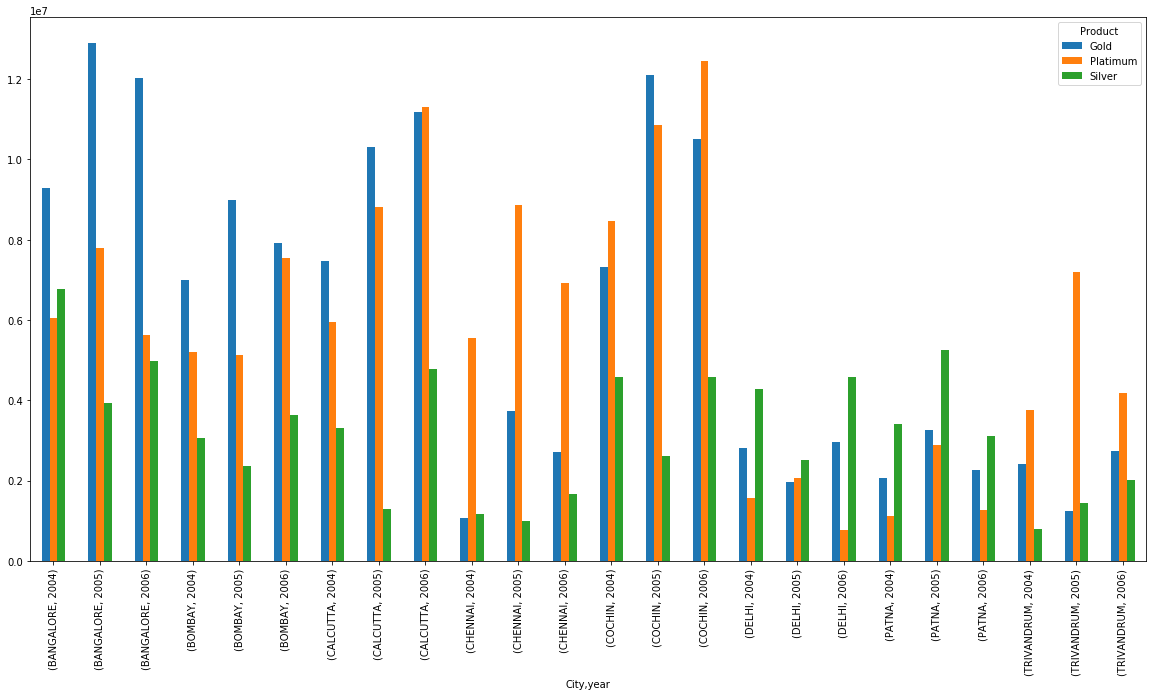

In [66]:
################### graphical representation for city wise spend on each product on yearly basis #########################

cust_spend1.pivot_table(index = ['City', 'year'], columns = 'Product', values = 'Amount', aggfunc = 'sum').plot(kind = 'bar',figsize=(20,10))
#plt.figure(figsize=(20,10))
plt.show()

In [ ]:
# 4. Create graphs for

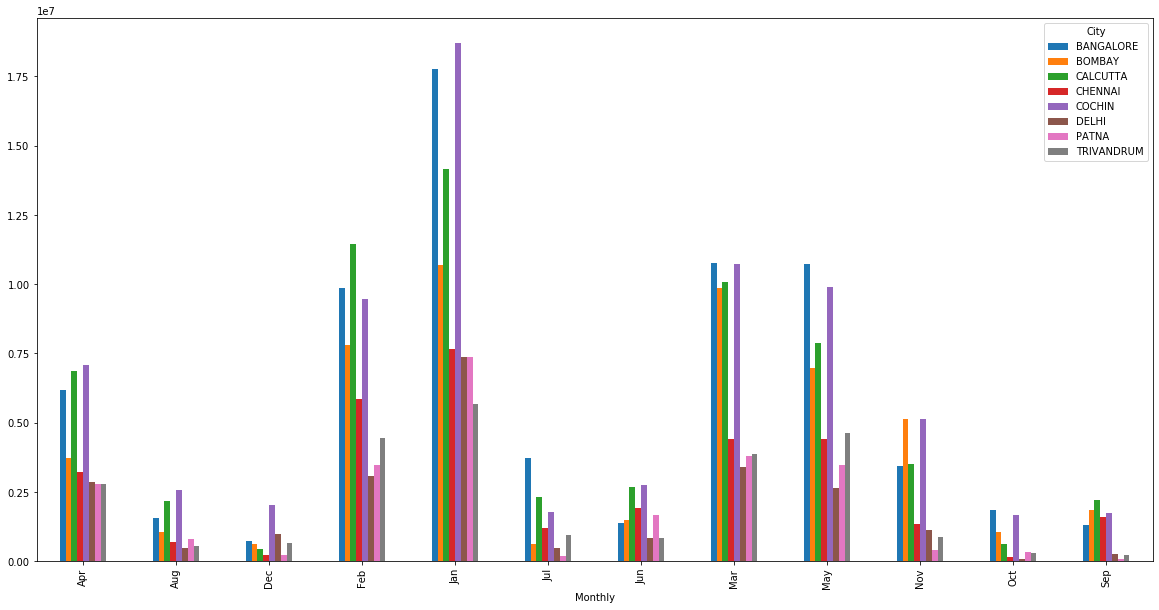

In [67]:
# a. Monthly comparison of total spends, city wise


cust_spend1.pivot_table(index = 'Monthly', columns = 'City', values = 'Amount', aggfunc = 'sum').plot(kind = 'bar',figsize=(20,10))
plt.show()

In [68]:
#  b. Comparison of yearly spend on air tickets

cust_spend1.head(10)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Monthly,year
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,Jan,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,Jan,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,Jan,2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,Jan,2004
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,Jan,2005
5,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,6,2005-02-23,SANDALS,168285.60,Feb,2005
6,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,7,2005-02-01,CAR,23370.20,Feb,2005
7,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,103,2004-01-12,TRAIN TICKET,440563.22,Jan,2004
8,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,117,2004-02-05,BUS TICKET,52208.65,Feb,2004
9,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,131,2006-04-19,AIR TICKET,346925.68,Apr,2006


In [69]:
# selecting the 'air ticket' Type for the yearly spend

cust_spend_yearly = cust_spend1.loc[cust_spend1.Type == 'AIR TICKET', ['year', 'Amount', 'Type']].reset_index(drop = True)
cust_spend_yearly

,year,Amount,Type
0,2006,346925.68,AIR TICKET
1,2006,10763.44,AIR TICKET
2,2006,357943.87,AIR TICKET
3,2006,305050.62,AIR TICKET
4,2006,173354.23,AIR TICKET
...,...,...,...
142,2005,217827.88,AIR TICKET
143,2005,30066.44,AIR TICKET
144,2006,31048.93,AIR TICKET
145,2006,124861.57,AIR TICKET


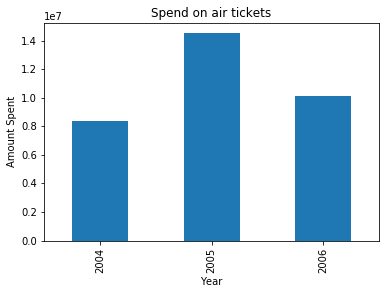

In [70]:
yearly_spend =  cust_spend_yearly.groupby('year').Amount.sum().plot(kind = 'bar')
plt.xlabel("Year")
plt.ylabel("Amount Spent")
plt.title("Spend on air tickets")
plt.show()

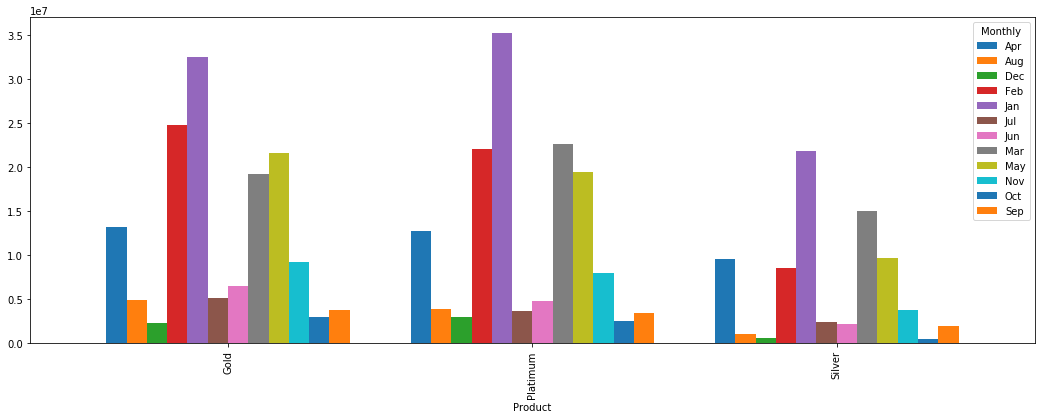

In [71]:
#  c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

cust_spend1.pivot_table(index='Product',columns='Monthly',values='Amount',aggfunc='sum').plot(kind = 'bar',figsize=(18,6),width=0.8)
plt.show()

In [72]:
# 5. Write user defined PYTHON function to perform the following analysis:
#You need to find top 10 customers for each city in terms of their repayment amount by 
#different products and by different time periods i.e. year or month.
#The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and 
#the function should automatically take these inputs while identifying the top 10 customers.

def top10Customers(Product_category,Time):
    return cust_repay.loc[(cust_repay.Product == Product_category)].groupby(['Customer',
                  'City','Product',Time]).Amount.sum().reset_index().sort_values('Amount',ascending=False).head(10)


In [75]:
Product_category=str(input("Product category should be in Gold/Silver/Platinum: "))
Time=str(input("Time Period and time period should be in Year/month: "))

Product category should be in Gold/Silver/Platinum: Gold
Time Period and time period should be in Year/month: Year


In [77]:
top10Customers_Analysis=top10Customers(Product_category,Time)
top10Customers_Analysis

,Customer,City,Product,Year,Amount
64,A61,COCHIN,Gold,2005,4276860.55
55,A44,DELHI,Gold,2005,4165317.77
58,A45,COCHIN,Gold,2005,4042447.57
52,A43,BANGALORE,Gold,2005,4006956.60
13,A13,BANGALORE,Gold,2005,3757673.00
65,A61,COCHIN,Gold,2006,3744127.41
61,A60,CALCUTTA,Gold,2005,3742856.10
14,A13,BANGALORE,Gold,2006,3477314.89
38,A29,CALCUTTA,Gold,2006,3434298.00
35,A28,TRIVANDRUM,Gold,2006,3376614.65
